In [1]:
import scanpy as sc
import pandas as pd
import pickle
import numpy as np
import graph_tool.all as gt
import anndata
import time
%matplotlib inline
%pylab

/usr/lib/python3/dist-packages/graph_tool/draw/cairo_draw.py:39: RuntimeWarning: Error importing cairo. Graph drawing will not work.
  warnings.warn(msg, RuntimeWarning)
/usr/lib/python3/dist-packages/graph_tool/draw/cairo_draw.py:39: RuntimeWarning: Error importing cairo. Graph drawing will not work.
  warnings.warn(msg, RuntimeWarning)
/usr/lib/python3/dist-packages/graph_tool/draw/cairo_draw.py:39: RuntimeWarning: Error importing cairo. Graph drawing will not work.
  warnings.warn(msg, RuntimeWarning)
/usr/lib/python3/dist-packages/graph_tool/all.py:40: RuntimeWarning: Error importing draw module, proceeding nevertheless: /usr/lib/python3/dist-packages/cairo/_cairo.cpython-37m-x86_64-linux-gnu.so: undefined symbol: cairo_tee_surface_index
  warnings.warn(msg, RuntimeWarning)


Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


In [2]:
adata= sc.read('pbmc/adata_sc_pbmc.h5ad')
sc.tl.rank_genes_groups(adata, 'leiden', method='t-test')
df_significativo= pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(20) #### df con i 20 geni significativi per gruppo

In [3]:
g = pickle.load( open( "pbmc/pbmc_g.pkl", "rb" ))

# 1) minimize nested blockmodel (state10 vs state) 
### 1a) state1 (53 secondi)

In [5]:
a=time.time()
state=gt.minimize_nested_blockmodel_dl(g, deg_corr=False)
b=time.time()
pickle.dump(state,open("pbmc/pbmc_state10_vs_state1/state1.pkl",'wb'),2)
c=b-a
print(c)
state

53.54616189002991


<NestedBlockState object, with base <BlockState object with 44 blocks (44 nonempty), for graph <Graph object, undirected, with 2638 vertices and 20976 edges at 0x7f57499f4450>, at 0x7f574a702050>, and 5 levels of sizes [(2638, 44), (44, 12), (12, 6), (6, 2), (2, 1)] at 0x7f574b072910>

In [4]:
state1=pickle.load( open( "pbmc/pbmc_state10_vs_state1/state1.pkl", "rb" ))

### 1b) state10 (553 secondi (circa 9 minuti))

In [7]:
state10=[]
a=time.time()
for i in range(10):
    i=gt.minimize_nested_blockmodel_dl(g, deg_corr=False)
    state10.append(i)
ent=[]
for i in range(len(state10)):
    x=state10[i].entropy()
    ent.append(x)
stateX=None
entX=None
for i in range(len(state10)):
    if stateX==None:
        stateX=state10[i]
        entX=ent[i]
    elif ent[i]<entX:
        entX=ent[i]
        stateX=state10[i]
print(stateX,entX)
pickle.dump(stateX,open("pbmc/pbmc_state10_vs_state1/state10.pkl",'wb'),2)
b=time.time()
c=b-a
print(c)

<NestedBlockState object, with base <BlockState object with 69 blocks (69 nonempty), for graph <Graph object, undirected, with 2638 vertices and 20976 edges at 0x7f57499f4450>, at 0x7f5747d6b910>, and 5 levels of sizes [(2638, 69), (69, 15), (15, 6), (6, 2), (2, 1)] at 0x7f574aff9a10> 97468.56803823188
553.1643359661102


In [5]:
state10=pickle.load( open( "pbmc/pbmc_state10_vs_state1/state10.pkl", "rb" ))

# 2) sweep (niter 10.000)
### 2a) state 1 (1k:5 sec)(10k: 48sec)(100k:472 sec (circa 8 minuti))

In [50]:
# 1k
bs = state1.get_bs()                   
bs += [np.zeros(1)] * (10 - len(bs))
state = state1.copy(bs=bs, sampling=True)
a=time.time()
state.mcmc_sweep(niter=1000)
b=time.time()
c=b-a
pickle.dump(state,open("pbmc/pbmc_state10_vs_state1/state1_sweep1k.pkl",'wb'),2)
print(c)
state

4.729897975921631


<NestedBlockState object, with base <BlockState object with 46 blocks (45 nonempty), for graph <Graph object, undirected, with 2638 vertices and 20976 edges at 0x7f574b38a2d0>, at 0x7f57474f5510>, and 10 levels of sizes [(2638, 45), (45, 13), (13, 6), (6, 2), (2, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1)] at 0x7f57474f5b90>

In [22]:
# 10k
bs = state1.get_bs()                   
bs += [np.zeros(1)] * (10 - len(bs))
state = state1.copy(bs=bs, sampling=True)
a=time.time()
state.mcmc_sweep(niter=10000)
b=time.time()
c=b-a
pickle.dump(state,open("pbmc/pbmc_state10_vs_state1/state1_sweep10k.pkl",'wb'),2)
print(c)
state

48.60097026824951


<NestedBlockState object, with base <BlockState object with 48 blocks (47 nonempty), for graph <Graph object, undirected, with 2638 vertices and 20976 edges at 0x7f574b38a2d0>, at 0x7f574756c390>, and 10 levels of sizes [(2638, 47), (47, 14), (14, 6), (6, 2), (2, 2), (2, 1), (1, 1), (1, 1), (1, 1), (1, 1)] at 0x7f574756c310>

In [26]:
# 100k
bs = state1.get_bs()                   
bs += [np.zeros(1)] * (10 - len(bs))
state = state1.copy(bs=bs, sampling=True)
a=time.time()
state.mcmc_sweep(niter=100000)
b=time.time()
c=b-a
pickle.dump(state,open("pbmc/pbmc_state10_vs_state1/state1_sweep100k.pkl",'wb'),2)
print(c)
state

472.4046468734741


<NestedBlockState object, with base <BlockState object with 51 blocks (50 nonempty), for graph <Graph object, undirected, with 2638 vertices and 20976 edges at 0x7f574b38a2d0>, at 0x7f574750f910>, and 10 levels of sizes [(2638, 50), (50, 15), (15, 6), (6, 4), (4, 2), (2, 1), (1, 1), (1, 1), (1, 1), (1, 1)] at 0x7f574750f890>

In [6]:
state1_sweep1k=pickle.load( open( "pbmc/pbmc_state10_vs_state1/state1_sweep1k.pkl", "rb" ))
state1_sweep10k=pickle.load( open( "pbmc/pbmc_state10_vs_state1/state1_sweep10k.pkl", "rb" ))
state1_sweep100k=pickle.load( open( "pbmc/pbmc_state10_vs_state1/state1_sweep100k.pkl", "rb" ))

### 2b) state 10 (1k: 6 secondi)(10k:57 sec)(100k:551(circa 9 minuti))

In [48]:
# 1k
bs = state10.get_bs()                   
bs += [np.zeros(1)] * (10 - len(bs))
state = state10.copy(bs=bs, sampling=True)
a=time.time()
state.mcmc_sweep(niter=1000)
b=time.time()
c=b-a
pickle.dump(state,open("pbmc/pbmc_state10_vs_state1/state10_sweep1k.pkl",'wb'),2)
print(c)
state

5.907205820083618


<NestedBlockState object, with base <BlockState object with 73 blocks (71 nonempty), for graph <Graph object, undirected, with 2638 vertices and 20976 edges at 0x7f574afd5e10>, at 0x7f572dd11e50>, and 10 levels of sizes [(2638, 71), (71, 16), (16, 7), (7, 2), (2, 2), (2, 1), (1, 1), (1, 1), (1, 1), (1, 1)] at 0x7f572dd113d0>

In [24]:
# 10k
bs = state10.get_bs()                   
bs += [np.zeros(1)] * (10 - len(bs))
state = state10.copy(bs=bs, sampling=True)
a=time.time()
state.mcmc_sweep(niter=10000)
b=time.time()
c=b-a
pickle.dump(state,open("pbmc/pbmc_state10_vs_state1/state10_sweep10k.pkl",'wb'),2)
print(c)
state

57.831109046936035


<NestedBlockState object, with base <BlockState object with 71 blocks (70 nonempty), for graph <Graph object, undirected, with 2638 vertices and 20976 edges at 0x7f574afd5e10>, at 0x7f5747535ed0>, and 10 levels of sizes [(2638, 70), (70, 15), (15, 6), (6, 4), (4, 2), (2, 1), (1, 1), (1, 1), (1, 1), (1, 1)] at 0x7f5747535e50>

In [28]:
# 100k
bs = state10.get_bs()                   
bs += [np.zeros(1)] * (10 - len(bs))
state = state10.copy(bs=bs, sampling=True)
a=time.time()
state.mcmc_sweep(niter=100000)
b=time.time()
c=b-a
pickle.dump(state,open("pbmc/pbmc_state10_vs_state1/state10_sweep100k.pkl",'wb'),2)
print(c)
state

551.1122505664825


<NestedBlockState object, with base <BlockState object with 75 blocks (74 nonempty), for graph <Graph object, undirected, with 2638 vertices and 20976 edges at 0x7f574afd5e10>, at 0x7f5747594ad0>, and 10 levels of sizes [(2638, 74), (74, 15), (15, 6), (6, 2), (2, 2), (2, 1), (1, 1), (1, 1), (1, 1), (1, 1)] at 0x7f5747594a50>

In [7]:
state10_sweep1k=pickle.load( open( "pbmc/pbmc_state10_vs_state1/state10_sweep1k.pkl", "rb" ))
state10_sweep10k=pickle.load( open( "pbmc/pbmc_state10_vs_state1/state10_sweep10k.pkl", "rb" ))
state10_sweep100k=pickle.load( open( "pbmc/pbmc_state10_vs_state1/state10_sweep100k.pkl", "rb" ))

# 3) equilibrate (wait=1000, epsilon=0.001, nbreaks=2)
### 3a) state1 (1k:686 sec(circa 11 min))(10k:331 sec (circa 5min e 30 sec))(100k: 335 sec (circa 5 min e 30 sec))

In [55]:
#1k
bs = state1_sweep1k.get_bs()                   
bs += [np.zeros(1)] * (10 - len(bs))

state = state1_sweep1k.copy(bs=bs, sampling=True)
gt.mcmc_equilibrate(state, wait=10, mcmc_args=dict(niter=10))
h = [np.zeros(g.num_vertices() + 1) for s in state.get_levels()]
pv = [None] * len(state.get_levels())


def collect_info(s):
    for l,sl in enumerate(s.get_levels()):
        B=sl.get_nonempty_B()
        h[l][B] +=1
        global pv
        pv=[sl.collect_vertex_marginals(pv[l]) for l, sl in enumerate(s.get_levels())]

In [56]:
#1k
bs = state1_sweep1k.get_bs()                   
bs += [np.zeros(1)] * (10 - len(bs))

state = state1_sweep1k.copy(bs=bs, sampling=True)

a=time.time()
gt.mcmc_equilibrate(state, wait=1000,nbreaks=2, max_niter=10000,epsilon=0.001, mcmc_args=dict(niter=10),callback=collect_info)
b=time.time()
pickle.dump(state,open("pbmc/pbmc_state10_vs_state1/e1k_state1.pkl",'wb'),2)
pickle.dump(h,open("pbmc/pbmc_state10_vs_state1/h1k_1.pkl",'wb'),2)
pickle.dump(pv,open("pbmc/pbmc_state10_vs_state1/pv1k_1.pkl",'wb'),2)
c=b-a
print(c)

state

686.6948564052582


<NestedBlockState object, with base <BlockState object with 60 blocks (58 nonempty), for graph <Graph object, undirected, with 2638 vertices and 20976 edges at 0x7f57474f5fd0>, at 0x7f5747853710>, and 10 levels of sizes [(2638, 58), (58, 18), (18, 10), (10, 5), (5, 3), (3, 3), (3, 3), (3, 3), (3, 3), (3, 2)] at 0x7f57478532d0>

In [34]:
#10k
bs = state1_sweep10k.get_bs()                   
bs += [np.zeros(1)] * (10 - len(bs))

state = state1_sweep10k.copy(bs=bs, sampling=True)
gt.mcmc_equilibrate(state, wait=10, mcmc_args=dict(niter=10))
h = [np.zeros(g.num_vertices() + 1) for s in state.get_levels()]
pv = [None] * len(state.get_levels())


def collect_info(s):
    for l,sl in enumerate(s.get_levels()):
        B=sl.get_nonempty_B()
        h[l][B] +=1
        global pv
        pv=[sl.collect_vertex_marginals(pv[l]) for l, sl in enumerate(s.get_levels())]

In [35]:
#10k
bs = state1_sweep10k.get_bs()                   
bs += [np.zeros(1)] * (10 - len(bs))

state = state1_sweep10k.copy(bs=bs, sampling=True)

a=time.time()
gt.mcmc_equilibrate(state, wait=1000,nbreaks=2, max_niter=10000,epsilon=0.001, mcmc_args=dict(niter=10),callback=collect_info)
b=time.time()
pickle.dump(state,open("pbmc/pbmc_state10_vs_state1/e10k_state1.pkl",'wb'),2)
pickle.dump(h,open("pbmc/pbmc_state10_vs_state1/h10k_1.pkl",'wb'),2)
pickle.dump(pv,open("pbmc/pbmc_state10_vs_state1/pv10k_1.pkl",'wb'),2)
c=b-a
print(c)

state

311.4608154296875


<NestedBlockState object, with base <BlockState object with 51 blocks (50 nonempty), for graph <Graph object, undirected, with 2638 vertices and 20976 edges at 0x7f574750f310>, at 0x7f57470a6e50>, and 10 levels of sizes [(2638, 50), (50, 16), (16, 8), (8, 6), (6, 5), (5, 4), (4, 3), (3, 2), (2, 2), (2, 1)] at 0x7f57470a6d90>

In [36]:
#100k
bs = state1_sweep100k.get_bs()                   
bs += [np.zeros(1)] * (10 - len(bs))

state = state1_sweep100k.copy(bs=bs, sampling=True)
gt.mcmc_equilibrate(state, wait=10, mcmc_args=dict(niter=10))
h = [np.zeros(g.num_vertices() + 1) for s in state.get_levels()]
pv = [None] * len(state.get_levels())


def collect_info(s):
    for l,sl in enumerate(s.get_levels()):
        B=sl.get_nonempty_B()
        h[l][B] +=1
        global pv
        pv=[sl.collect_vertex_marginals(pv[l]) for l, sl in enumerate(s.get_levels())]

In [37]:
#100k
bs = state1_sweep100k.get_bs()                   
bs += [np.zeros(1)] * (10 - len(bs))

state = state1_sweep100k.copy(bs=bs, sampling=True)

a=time.time()
gt.mcmc_equilibrate(state, wait=1000,nbreaks=2, max_niter=10000,epsilon=0.001, mcmc_args=dict(niter=10),callback=collect_info)
b=time.time()
pickle.dump(state,open("pbmc/pbmc_state10_vs_state1/e100k_state1.pkl",'wb'),2)
pickle.dump(h,open("pbmc/pbmc_state10_vs_state1/h100k_1.pkl",'wb'),2)
pickle.dump(pv,open("pbmc/pbmc_state10_vs_state1/pv100k_1.pkl",'wb'),2)
c=b-a
print(c)

state

335.77116417884827


<NestedBlockState object, with base <BlockState object with 54 blocks (52 nonempty), for graph <Graph object, undirected, with 2638 vertices and 20976 edges at 0x7f57477bcdd0>, at 0x7f574709b850>, and 10 levels of sizes [(2638, 52), (52, 16), (16, 8), (8, 5), (5, 4), (4, 3), (3, 2), (2, 2), (2, 2), (2, 2)] at 0x7f574709b8d0>

In [8]:
estate1_1k=pickle.load( open( "pbmc/pbmc_state10_vs_state1/e1k_state1.pkl", "rb" ))
estate1_10k=pickle.load( open( "pbmc/pbmc_state10_vs_state1/e10k_state1.pkl", "rb" ))
estate1_100k=pickle.load( open( "pbmc/pbmc_state10_vs_state1/e100k_state1.pkl", "rb" ))

### state10 (1K:727 sec(circa 12 min))(10k:1035 sec(circa 17 min))(100k: 408 sec(circa 7 min))

In [52]:
#1k
bs = state10_sweep1k.get_bs()                   
bs += [np.zeros(1)] * (10 - len(bs))

state = state10_sweep1k.copy(bs=bs, sampling=True)
gt.mcmc_equilibrate(state, wait=10, mcmc_args=dict(niter=10))
h = [np.zeros(g.num_vertices() + 1) for s in state.get_levels()]
pv = [None] * len(state.get_levels())


def collect_info(s):
    for l,sl in enumerate(s.get_levels()):
        B=sl.get_nonempty_B()
        h[l][B] +=1
        global pv
        pv=[sl.collect_vertex_marginals(pv[l]) for l, sl in enumerate(s.get_levels())]

In [53]:
#1k
bs = state10_sweep1k.get_bs()                   
bs += [np.zeros(1)] * (10 - len(bs))

state = state10_sweep1k.copy(bs=bs, sampling=True)

a=time.time()
gt.mcmc_equilibrate(state, wait=1000,nbreaks=2, max_niter=10000,epsilon=0.001, mcmc_args=dict(niter=10),callback=collect_info)
b=time.time()
pickle.dump(state,open("pbmc/pbmc_state10_vs_state1/e1k_state10.pkl",'wb'),2)
pickle.dump(h,open("pbmc/pbmc_state10_vs_state1/h1k_10.pkl",'wb'),2)
pickle.dump(pv,open("pbmc/pbmc_state10_vs_state1/pv1k_10.pkl",'wb'),2)
c=b-a
print(c)

state

727.6969203948975


<NestedBlockState object, with base <BlockState object with 79 blocks (78 nonempty), for graph <Graph object, undirected, with 2638 vertices and 20976 edges at 0x7f572ddb0f10>, at 0x7f5747589650>, and 10 levels of sizes [(2638, 78), (78, 20), (20, 7), (7, 5), (5, 4), (4, 3), (3, 3), (3, 3), (3, 2), (2, 2)] at 0x7f57475898d0>

In [39]:
#10k
bs = state10_sweep10k.get_bs()                   
bs += [np.zeros(1)] * (10 - len(bs))

state = state10_sweep10k.copy(bs=bs, sampling=True)
gt.mcmc_equilibrate(state, wait=10, mcmc_args=dict(niter=10))
h = [np.zeros(g.num_vertices() + 1) for s in state.get_levels()]
pv = [None] * len(state.get_levels())


def collect_info(s):
    for l,sl in enumerate(s.get_levels()):
        B=sl.get_nonempty_B()
        h[l][B] +=1
        global pv
        pv=[sl.collect_vertex_marginals(pv[l]) for l, sl in enumerate(s.get_levels())]

In [40]:
#10k
bs = state10_sweep10k.get_bs()                   
bs += [np.zeros(1)] * (10 - len(bs))

state = state10_sweep10k.copy(bs=bs, sampling=True)

a=time.time()
gt.mcmc_equilibrate(state, wait=1000,nbreaks=2, max_niter=10000,epsilon=0.001, mcmc_args=dict(niter=10),callback=collect_info)
b=time.time()
pickle.dump(state,open("pbmc/pbmc_state10_vs_state1/e10k_state10.pkl",'wb'),2)
pickle.dump(h,open("pbmc/pbmc_state10_vs_state1/h10k_10.pkl",'wb'),2)
pickle.dump(pv,open("pbmc/pbmc_state10_vs_state1/pv10k_10.pkl",'wb'),2)
c=b-a
print(c)

state

1035.867653131485


<NestedBlockState object, with base <BlockState object with 77 blocks (75 nonempty), for graph <Graph object, undirected, with 2638 vertices and 20976 edges at 0x7f5747594910>, at 0x7f572df7d650>, and 10 levels of sizes [(2638, 75), (75, 20), (20, 8), (8, 6), (6, 4), (4, 4), (4, 4), (4, 2), (2, 2), (2, 2)] at 0x7f572df7dcd0>

In [41]:
#100k
bs = state10_sweep100k.get_bs()                   
bs += [np.zeros(1)] * (10 - len(bs))

state = state10_sweep100k.copy(bs=bs, sampling=True)
gt.mcmc_equilibrate(state, wait=10, mcmc_args=dict(niter=10))
h = [np.zeros(g.num_vertices() + 1) for s in state.get_levels()]
pv = [None] * len(state.get_levels())


def collect_info(s):
    for l,sl in enumerate(s.get_levels()):
        B=sl.get_nonempty_B()
        h[l][B] +=1
        global pv
        pv=[sl.collect_vertex_marginals(pv[l]) for l, sl in enumerate(s.get_levels())]

In [42]:
#100k
bs = state10_sweep100k.get_bs()                   
bs += [np.zeros(1)] * (10 - len(bs))

state = state10_sweep100k.copy(bs=bs, sampling=True)

a=time.time()
gt.mcmc_equilibrate(state, wait=1000,nbreaks=2, max_niter=10000,epsilon=0.001, mcmc_args=dict(niter=10),callback=collect_info)
b=time.time()
pickle.dump(state,open("pbmc/pbmc_state10_vs_state1/e100k_state10.pkl",'wb'),2)
pickle.dump(h,open("pbmc/pbmc_state10_vs_state1/h100k_10.pkl",'wb'),2)
pickle.dump(pv,open("pbmc/pbmc_state10_vs_state1/pv100k_10.pkl",'wb'),2)
c=b-a
print(c)

state

408.0377502441406


<NestedBlockState object, with base <BlockState object with 78 blocks (76 nonempty), for graph <Graph object, undirected, with 2638 vertices and 20976 edges at 0x7f574755ca90>, at 0x7f57470a2310>, and 10 levels of sizes [(2638, 76), (76, 17), (17, 9), (9, 6), (6, 4), (4, 2), (2, 2), (2, 2), (2, 2), (2, 2)] at 0x7f572df85990>

In [9]:
estate10_1k=pickle.load( open( "pbmc/pbmc_state10_vs_state1/e1k_state10.pkl", "rb" ))
estate10_10k=pickle.load( open( "pbmc/pbmc_state10_vs_state1/e10k_state10.pkl", "rb" ))
estate10_100k=pickle.load( open( "pbmc/pbmc_state10_vs_state1/e100k_state10.pkl", "rb" ))

# 4) reppresentation
### 4a) minimize nested block model

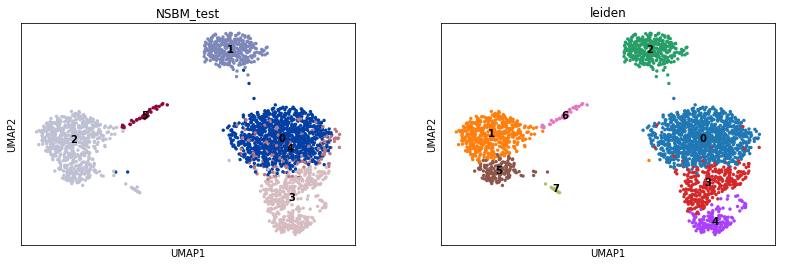

leiden        0    1    2    3    4    5   6   7
NSBM_test                                       
0          1001    0    2   20    0    2   0   0
1             0    0  339    0    0    0   0   0
2             0  486    0    0    0  148   0  13
3             4    0    0  258  163    0   0   0
4           138    0    0   28    0    0   0   0
5             0    0    0    0    0    0  36   0


In [15]:
#state1
adata.obs.loc[:, 'NSBM_test'] = pd.Categorical(list(state1.project_level(2).get_blocks()))
sc.pl.umap(adata, color=["NSBM_test", 'leiden'], legend_loc='on data')
print(pd.crosstab(adata.obs.NSBM_test, adata.obs.leiden))

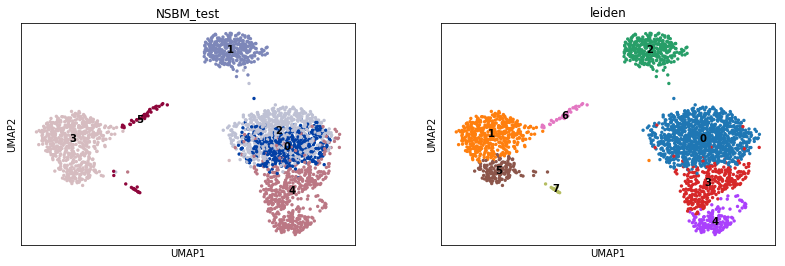

leiden       0    1    2    3    4    5   6   7
NSBM_test                                      
0          448    0    0    9    0    0   0   0
1            0    0  339    0    0    0   0   0
2          634    0    2    3    0    1   0   0
3            0  486    0    0    0  146   0   0
4           61    0    0  294  163    1   0   0
5            0    0    0    0    0    2  36  13


In [16]:
#state10
adata.obs.loc[:, 'NSBM_test'] = pd.Categorical(list(state10.project_level(2).get_blocks()))
sc.pl.umap(adata, color=["NSBM_test", 'leiden'], legend_loc='on data')
print(pd.crosstab(adata.obs.NSBM_test, adata.obs.leiden))

### 4b) sweep

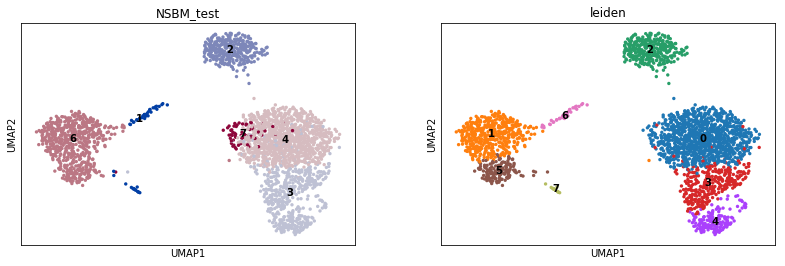

leiden        0    1    2    3    4    5   6   7
NSBM_test                                       
1             0    0    0    0    0    2  32  13
2             0    0  341    0    0    0   0   0
3            43    0    0  288  163    1   0   0
4          1038    0    0   16    0    0   0   0
6             0  486    0    0    0  146   4   0
7            62    0    0    2    0    1   0   0


In [58]:
#state1_1k
adata.obs.loc[:, 'NSBM_test'] = pd.Categorical(list(state1_sweep1k.project_level(2).get_blocks()))
sc.pl.umap(adata, color=["NSBM_test", 'leiden'], legend_loc='on data')
print(pd.crosstab(adata.obs.NSBM_test, adata.obs.leiden))

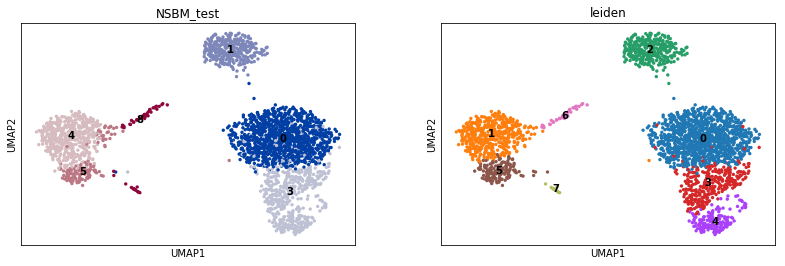

leiden        0    1    2    3    4    5   6   7
NSBM_test                                       
0          1099    0    1   17    0    1   0   0
1             0    0  340    0    0    0   0   0
3            44    0    0  289  163    1   0   0
4             0  455    0    0    0   43   0   0
5             0   31    0    0    0  103   0   0
8             0    0    0    0    0    2  36  13


In [30]:
#state1_10k
adata.obs.loc[:, 'NSBM_test'] = pd.Categorical(list(state1_sweep10k.project_level(2).get_blocks()))
sc.pl.umap(adata, color=["NSBM_test", 'leiden'], legend_loc='on data')
print(pd.crosstab(adata.obs.NSBM_test, adata.obs.leiden))

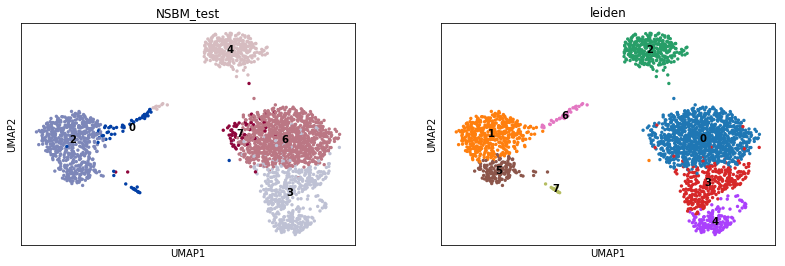

leiden        0    1    2    3    4    5   6   7
NSBM_test                                       
0             0   22    0    0    0    2  27  13
2             0  464    0    0    0  146   0   0
3            39    0    0  289  163    0   0   0
4             0    0  340    0    0    0   9   0
6          1052    0    0   14    0    0   0   0
7            52    0    1    3    0    2   0   0


In [31]:
#state1_100k
adata.obs.loc[:, 'NSBM_test'] = pd.Categorical(list(state1_sweep100k.project_level(2).get_blocks()))
sc.pl.umap(adata, color=["NSBM_test", 'leiden'], legend_loc='on data')
print(pd.crosstab(adata.obs.NSBM_test, adata.obs.leiden))

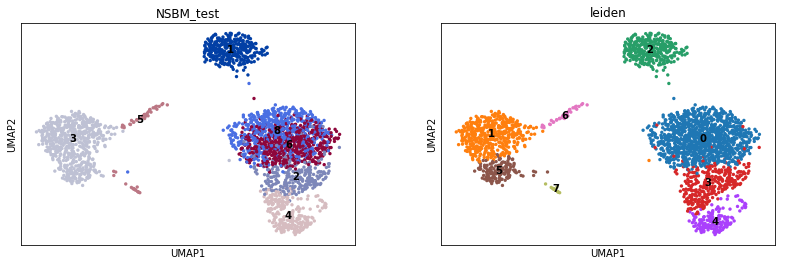

leiden       0    1    2    3    4    5   6   7
NSBM_test                                      
1            0    0  340    0    0    0   0   0
2           42    0    0  208    0    0   0   0
3            0  486    0    0    0  146   0   0
4            0    0    0   82  163    0   0   0
5            0    0    0    0    0    3  36  13
6          538    0    0   13    0    0   0   0
8          563    0    1    3    0    1   0   0


In [59]:
#state10_1k
adata.obs.loc[:, 'NSBM_test'] = pd.Categorical(list(state10_sweep1k.project_level(2).get_blocks()))
sc.pl.umap(adata, color=["NSBM_test", 'leiden'], legend_loc='on data')
print(pd.crosstab(adata.obs.NSBM_test, adata.obs.leiden))

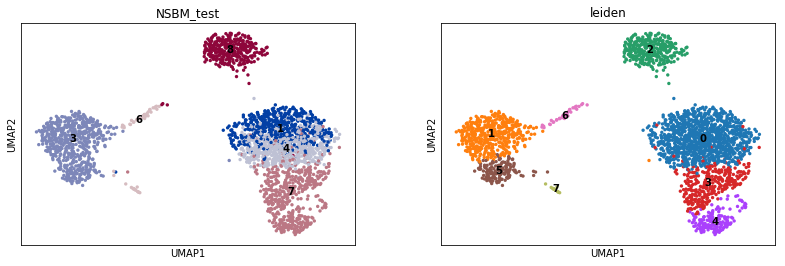

leiden       0    1    2    3    4    5   6   7
NSBM_test                                      
1          531    0    0    2    0    1   0   0
3            0  486    0    0    0  146   0   0
4          570    0    0   11    0    0   0   0
6            0    0    0    0    0    2  33  13
7           41    0    0  293  163    1   0   0
8            1    0  341    0    0    0   3   0


In [32]:
#state10_10k
adata.obs.loc[:, 'NSBM_test'] = pd.Categorical(list(state10_sweep10k.project_level(2).get_blocks()))
sc.pl.umap(adata, color=["NSBM_test", 'leiden'], legend_loc='on data')
print(pd.crosstab(adata.obs.NSBM_test, adata.obs.leiden))

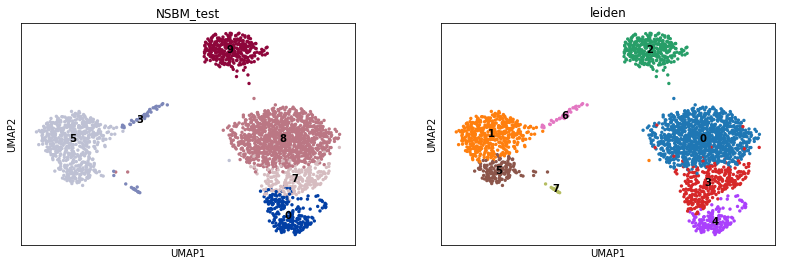

leiden        0    1    2    3    4    5   6   7
NSBM_test                                       
0             0    0    0   79  163    0   0   0
3             0    0    0    0    0    2  36  13
5             0  486    0    0    0  146   0   0
7            24    0    0  206    0    0   0   0
8          1119    0    0   21    0    2   0   0
9             0    0  341    0    0    0   0   0


In [33]:
#state10_100k
adata.obs.loc[:, 'NSBM_test'] = pd.Categorical(list(state10_sweep100k.project_level(2).get_blocks()))
sc.pl.umap(adata, color=["NSBM_test", 'leiden'], legend_loc='on data')
print(pd.crosstab(adata.obs.NSBM_test, adata.obs.leiden))

### 4c) equilibrate

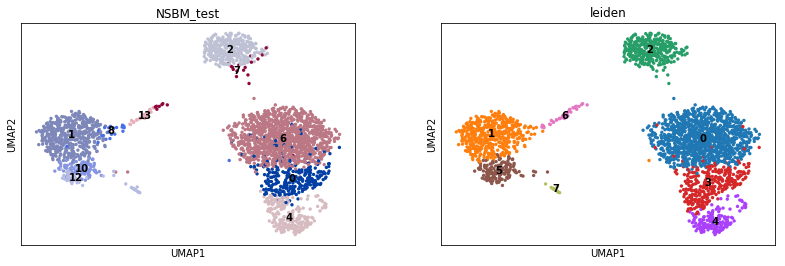

leiden        0    1    2    3    4   5   6   7
NSBM_test                                      
0            40    0    0  225    1   0   0   0
1             0  462    0    0    0   9   0   0
2             0    0  325    0    0   0   0   0
4             0    0    0   62  162   0   0   0
6          1102    0    0   19    0   2   0   0
7             1    0   16    0    0   0   7   0
8             0   19    0    0    0   0   4   0
10            0    5    0    0    0  90   0   0
12            0    0    0    0    0  49   0  13
13            0    0    0    0    0   0  25   0


In [60]:
#state1_1k
adata.obs.loc[:, 'NSBM_test'] = pd.Categorical(list(estate1_1k.project_level(2).get_blocks()))
sc.pl.umap(adata, color=["NSBM_test", 'leiden'], legend_loc='on data')
print(pd.crosstab(adata.obs.NSBM_test, adata.obs.leiden))

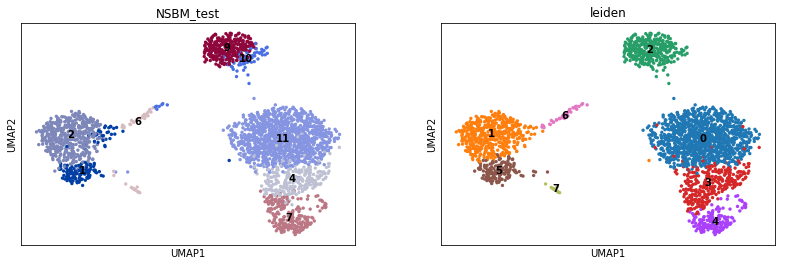

leiden        0    1    2    3    4    5   6   7
NSBM_test                                       
1             0   34    0    0    0  116   0   0
2             0  452    0    0    0   30   0   0
4            28    0    0  225    1    0   0   0
6             0    0    0    0    0    2  29  13
7             0    0    0   63  162    0   0   0
9             0    0  274    0    0    0   0   0
10            0    0   67    0    0    0   7   0
11         1115    0    0   18    0    2   0   0


In [44]:
#state1_10k
adata.obs.loc[:, 'NSBM_test'] = pd.Categorical(list(estate1_10k.project_level(2).get_blocks()))
sc.pl.umap(adata, color=["NSBM_test", 'leiden'], legend_loc='on data')
print(pd.crosstab(adata.obs.NSBM_test, adata.obs.leiden))

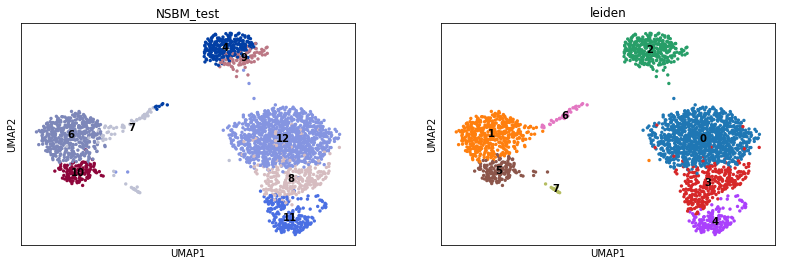

leiden        0    1    2    3    4    5   6   7
NSBM_test                                       
4             0    0  248    0    0    0   7   0
6             0  459    0    0    0   17   0   0
7             0   26    0    0    0    2  29  13
8            40    0    0  229    1    0   0   0
9             0    0   91    0    0    0   0   0
10            0    1    0    0    0  129   0   0
11            0    0    0   60  162    0   0   0
12         1103    0    2   17    0    2   0   0


In [45]:
#state1_100k
adata.obs.loc[:, 'NSBM_test'] = pd.Categorical(list(estate1_100k.project_level(2).get_blocks()))
sc.pl.umap(adata, color=["NSBM_test", 'leiden'], legend_loc='on data')
print(pd.crosstab(adata.obs.NSBM_test, adata.obs.leiden))

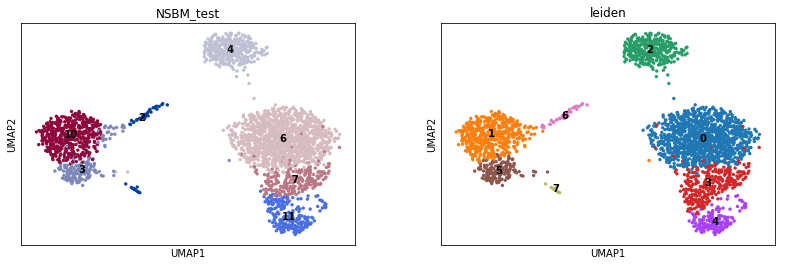

leiden        0    1    2    3    4    5   6   7
NSBM_test                                       
2             0    0    0    0    0    0  32  13
3             0   31    0    0    0  134   4   0
4             0    0  341    0    0    0   0   0
6          1129    0    0   26    0    2   0   0
7            14    0    0  215    0    0   0   0
10            0  455    0    0    0   14   0   0
11            0    0    0   65  163    0   0   0


In [61]:
#state10_1k
adata.obs.loc[:, 'NSBM_test'] = pd.Categorical(list(estate10_1k.project_level(2).get_blocks()))
sc.pl.umap(adata, color=["NSBM_test", 'leiden'], legend_loc='on data')
print(pd.crosstab(adata.obs.NSBM_test, adata.obs.leiden))

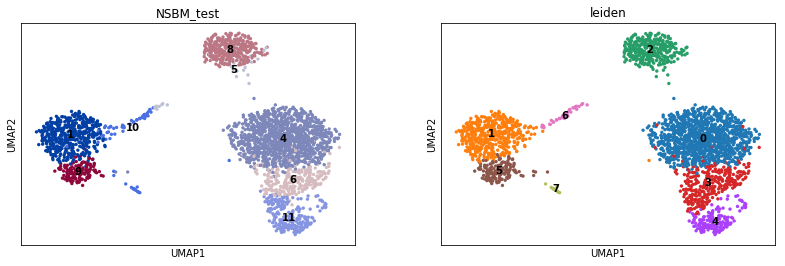

leiden        0    1    2    3    4    5   6   7
NSBM_test                                       
1             0  461    0    0    0   13   0   0
4          1121    0    0   23    0    2   0   0
5             1    0   18    0    0    0   8   0
6            21    0    0  219    1    0   0   0
8             0    0  323    0    0    0   0   0
9             0    3    0    0    0  133   0   0
10            0   22    0    0    0    2  28  13
11            0    0    0   64  162    0   0   0


In [46]:
#state10_10k
adata.obs.loc[:, 'NSBM_test'] = pd.Categorical(list(estate10_10k.project_level(2).get_blocks()))
sc.pl.umap(adata, color=["NSBM_test", 'leiden'], legend_loc='on data')
print(pd.crosstab(adata.obs.NSBM_test, adata.obs.leiden))

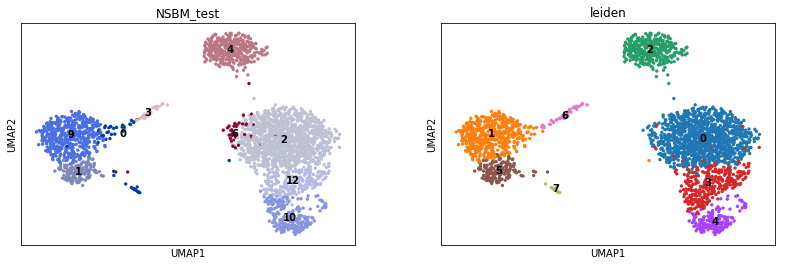

leiden        0    1    2    3    4    5   6   7
NSBM_test                                       
0             0   22    0    0    0    2  10  13
1             0    2    0    0    0  137   0   0
2          1094    0    0   22    0    0   0   0
3             0    0    0    0    0    0  26   0
4             0    0  340    0    0    0   0   0
6            33    0    1    2    0    2   0   0
9             0  462    0    0    0    9   0   0
10            0    0    0   57  162    0   0   0
12           16    0    0  225    1    0   0   0


In [47]:
#state10_100k
adata.obs.loc[:, 'NSBM_test'] = pd.Categorical(list(estate10_100k.project_level(2).get_blocks()))
sc.pl.umap(adata, color=["NSBM_test", 'leiden'], legend_loc='on data')
print(pd.crosstab(adata.obs.NSBM_test, adata.obs.leiden))

# 5) conclusioni:
### 5a) è inutile fare 10 iterazioni di minimize_nested_blockmodel e scegliere quella con entropia minore
### 5b) fare lo sweep all'interno del minimize_nested_blockmodel rallenta il processo e non fa fare lo stesso numero di niter a parità di tempo
### 5c) nello sweep non è necessario fare 100.000 niter, viene bene anche con 10.000 (con 1.000 ci mette meno lo sweep ma di più l'equilibrate e in ogni caso non sembra funzionare davvero meglio): ovviamente diminuisce il tempo
### 5d) i cluster ottenuti sembrano abbastanza robusti, sarebbe necessario caratterizzarli